# AGN

This notebook includes some examples for generating predictions for AGN using `gaslight`.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from gaslight.grid import Grid
from synthesizer import line_ratios

## Open a grid and get basic information

In [2]:
grid_dir = '/Users/sw376/Dropbox/Research/data/gaslight/grids'
grid_name = 'qsosed-isotropic-limited-agn-c23.01-reduced-v1' # WORKS
grid_name = 'qsosed-isotropic-limited-agn-c23.01-v1' # DOES NOT WORK
grid_name = 'bpl-feltre16-agn-c23.01-v1' # EWs wrong
grid_name = 'bpl-feltre16-agn-c23.01-reduced-v1' # EWs wrong

g = Grid(grid_dir=grid_dir, grid_name=grid_name)

print(g)

------------------------------
SUMMARY OF GASLIGHT GRID
Grid dimensions: 
  Numer of axes: 7
  Grid shape: (6, 1, 1, 7, 3, 6, 3)
  Numer of models: 2268
  Numer of failed models: 7 (0.31%)
Grid axes: 
  alpha1: [-2.  -1.8 -1.6 -1.4 -1.2 -1. ] 
  alpha2: [-0.5] 
  alpha3: [2.] 
  metallicity: [0.0001 0.0003 0.001  0.003  0.01   0.03   0.05  ] 
  ionisation_parameter: [1.e-04 1.e-02 1.e+00] 
  hydrogen_density: [1.e+02 1.e+04 1.e+06 1.e+08 1.e+10 1.e+12] 
  stop_column_density: [21. 23. 25.] 
------------------------------



### Generate Balmer lines

In [3]:
line_ids = [
    'H 1 4861.32A', 
    'H 1 6562.80A', 
    ]
lines = g.get_line_collection(line_ids=line_ids)
print(lines)

----------
LINE COLLECTION
number of lines: 2
lines: ['H 1 4861.32A' 'H 1 6562.80A']
available ratios: ['BalmerDecrement']
available diagrams: []
----------


## BLR

In [4]:
# define the selection for the BLR just using the H density.
blr_selection = g.axes_values_flattened['hydrogen_density'] >= 1E9

# print how many moels there are
print(np.sum(blr_selection))

756


### luminosities (bolometric corrections for AGN)

Plot the distribution of H $\alpha$ luminosities. For AGN grids this is equivalent to the bolometric correction.

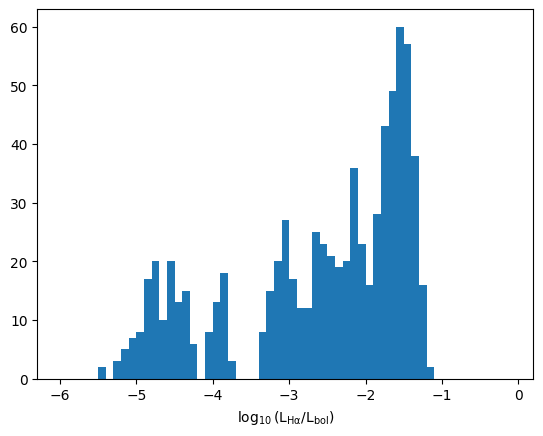

In [5]:
bins = np.arange(-6., 0.0, 0.1)
plt.hist(np.log10(lines['H 1 6562.80A'].luminosity.flatten().to('erg/s').value[blr_selection]), bins = bins)
plt.xlabel(r'$\rm \log_{10}(L_{H\alpha}/L_{bol})$')
plt.show()

### Equivalent widths

The `synthesizer` Line objects also store the equivalent widths.

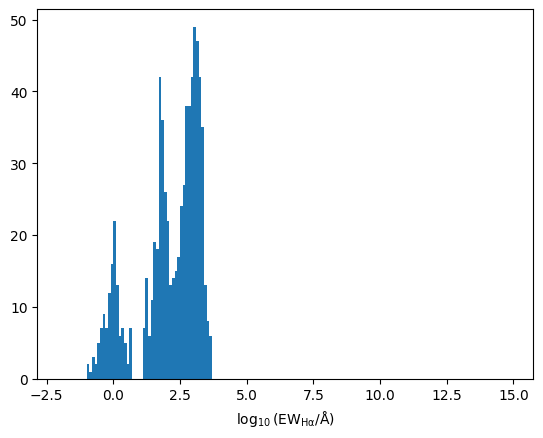

In [6]:
bins = np.arange(-2., 15., 0.1)
plt.hist(np.log10(lines['H 1 6562.80A'].equivalent_width.flatten().to('Angstrom').value[blr_selection]), bins = bins)
plt.xlabel(r'$\rm \log_{10}(EW_{H\alpha}/\AA)$')
plt.show()

### Balmer Decrement

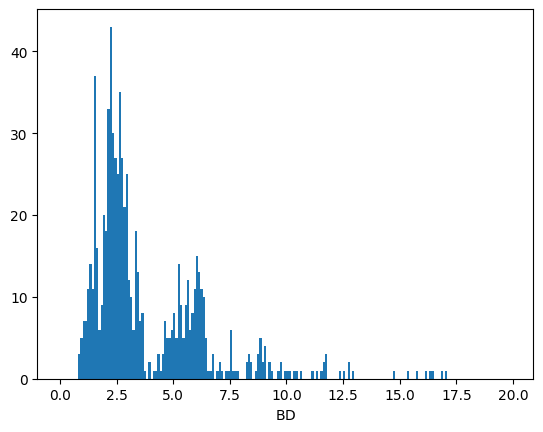

In [12]:
ratio = lines.get_ratio('BalmerDecrement').flatten()[blr_selection]

selection = np.ones(len(ratio), dtype='bool')
# selection = (g.axes_values_flattened['hydrogen_density'] < 10**4) & (g.axes_values_flattened['stop_column_density'] < 23.0)
# selection = (g.axes_values_flattened['hydrogen_density'] < 10**4) & (g.axes_values_flattened['metallicity'] < 0.01)

bins = np.arange(0., 20., 0.1)
plt.hist(ratio[selection], bins = bins)
plt.xlabel(r'$\rm BD$')
plt.show()

## Type II AGN

In [9]:
nlr_selection = g.axes_values_flattened['hydrogen_density'] <= 1E4

# for the NLR we want to set the incident_escape_fraction=0.0 since we are not seeing the central source. A consequence of this is that we can have very high-EWs since we only have the nebular continuum.
lines = g.get_line_collection(
    line_ids=line_ids,
    incident_escape_fraction=0.0)

### Equivalent width

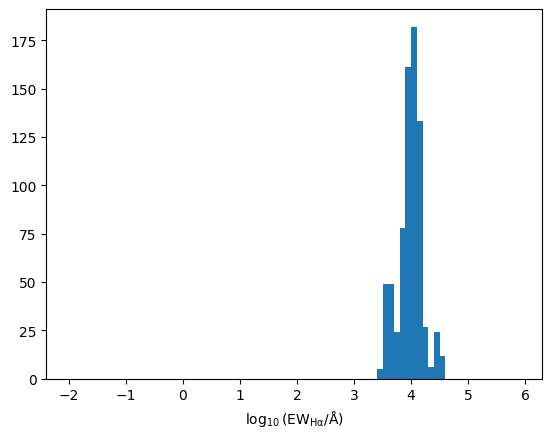

In [10]:
bins = np.arange(-2., 6., 0.1)
plt.hist(np.log10(lines['H 1 6562.80A'].equivalent_width.flatten().to('Angstrom').value[nlr_selection]), bins = bins)
plt.xlabel(r'$\rm \log_{10}(EW_{H\alpha}/\AA)$')
plt.show()

### BPT diagram

We can also generate a LineCollection containing the entire grid (preserving its original shape). 

In [ ]:
line_ids = [
    'H 1 4861.32A', 
    'O 3 4958.91A', 
    'O 3 5006.84A', 
    'H 1 6562.80A', 
    'N 2 6583.45A', 
    'Ni 2 6666.80A'
    ]
lines = g.get_line_collection(line_ids=line_ids)
print(lines)

----------
LINE COLLECTION
number of lines: 6
lines: ['H 1 4861.32A' 'O 3 4958.91A' 'O 3 5006.84A' 'H 1 6562.80A'
 'N 2 6583.45A' 'Ni 2 6666.80A']
available ratios: ['BalmerDecrement', 'N2', 'R3']
available diagrams: ['BPT-NII']
----------
